# Análisis del abandono de una compañía telefónica

# 1. Business Understanding

- Determine Business Objectives
    - Undestand what the client really wants to accomplish: Reducir la tasa de abandono en los clientes minimizando costes.
    - Uncover important factors that can influence the outcome of the project
    - Neglecting this step is to expend a ton of effort producing right answers to wrong questions!
- Assess Situation
    - More detailed fact finding about all the resources, constraints, assumptions and other factors.
- Determine Data Mining Goals
    - State objectives in business terminology: Reducir la tasa de abandono de los clientes minimizando costes
    - State objectives in technical terms: Encontrar qué factores afectan a abandono del cliente
- Produce Proyect Plan
    - Describe the intended plan for achieving the data mining and business goals.
    - Specify the ancticipated set of steps to be performed.

# 2. Data Understanding
Starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data or to detect interesting subsets to form hypotheses for hidden information.

- Collect  Initial Data
- Describe Data
    - Examine the 'gross' properties of the acquired data
- Explore Data
    - Check for: distribution of key attributes, results of simple aggregations, relations between pairs, small number of attributes properties of significant sub-populations, simple statistical analyses.
- Verify Data Quality
    - Is the data complete?
    - Are there any missing values?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt

In [2]:
# Read data
customers = pd.read_csv('customers.csv')

In [3]:
customers

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
customers.shape

(7043, 21)

In [5]:
customers.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
customers.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
customers.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
customers.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

C:\Users\juani\miniconda3\envs\env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


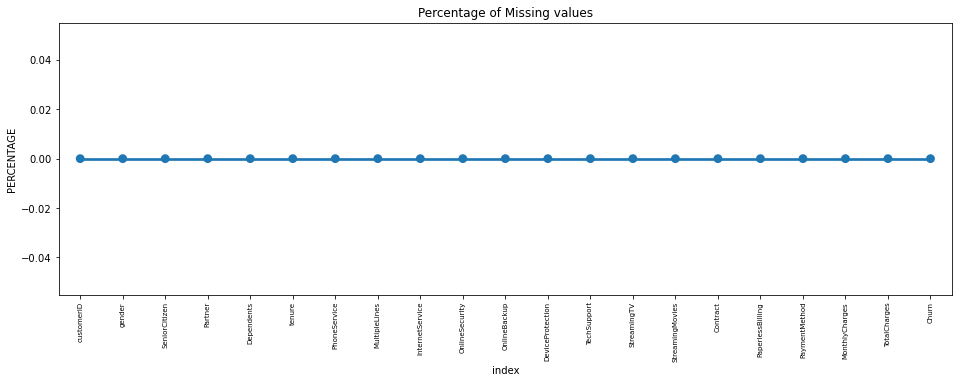

In [9]:
missing = pd.DataFrame((customers.isnull().sum())*100/customers.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [10]:
# Comprobación del balance de la muestra

num_total = customers['Churn'].count()
num_dados_baja = customers[customers['Churn'] == 'Yes']['Churn'].count()

print("Dados de baja: {num_baja} ({perc:.2f}%)".format(num_baja = num_dados_baja, perc= num_dados_baja/num_total * 100))


Dados de baja: 1869 (26.54%)


Muestra no balanceada!

# 3. Data Preparation
Covers all activities to construct the final dataset from the initial raw data. Data preparation tasks are likely to be performed multiple times and not in any prescribed order. Tasks include table, record and attribute selection as well as transformation and cleaning of data for modeling tools.

- Select Data
    - Decide on the data to be used for analysis
    - Selection criteria include relevance to the data mining goals, quality and technical constraints such as limits on data volum,e or data types
    - Coversx selection of attributes as well as selection of records in a table
- Clean Data
    - Raise the data quality to the level required by the selected analysis techniques
    - May involve selection of clean subsets of the data, insertion of suitable defaults or more ambitious techniques such as the estimation of missing data by modeling
- Construct Data
    - Constructive data preparation operations such as the production of derived attributes, entire new records or transformed values for exisitng attributes
- Integrate Data
    - Methods whereby information is combined from multiple tables or records to create new records or values
- Format Data
    - Formatting transformations refer to primarily syntatic modiufications made to the data that do not change its meaning, but might be required by the modeling tool

In [11]:
# creamos copia de los datos para trabajar
cust = customers.copy()

In [12]:
cust

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [13]:
# Comprobamos duplicados
cust[cust.duplicated() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [14]:
# Eliminamos las columnas que no son relevantes
cust.drop(["customerID"], axis=1, inplace = True)

In [15]:
cust.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
cust['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [17]:
# Por simpicidad los nombre de columans empiezan todos por mayúscula
cust.columns = [value[0].capitalize() + value[1:] for value in cust.columns]
cust

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [18]:
cust.dtypes

Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
cust["TotalCharges"] = pd.to_numeric(cust['TotalCharges'], errors='coerce')

In [20]:
nan_values = cust["TotalCharges"].isnull().sum()
total = cust.shape[0]
print("Faltan el {per:.4f}% de los valores".format(per = nan_values/total*100))

Faltan el 0.1562% de los valores


In [21]:
# Faltan muy pocos valores, podemos desecharlos
cust["TotalCharges"].dropna()

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [22]:
cust['TotalCharges'] = cust['TotalCharges'].astype(float)

In [23]:
cust["TotalCharges"].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [24]:
# No son relevante los meses de permanencia tal como están, nos interesa dividirlo 
# en un conjunto más amplio por ejemplo, por años.
# Necesitamos entoces ver el máximo valor de permanencia
cust["Tenure"].max()

72

In [25]:
# Queremos categorizar la permanencia desde 0 años hasta 72 meses (6 años)
cust['TenureGroup'] = pd.cut(cust["Tenure"], [0,12,24,36,48,60,72])

In [26]:
# Ahora podemos deshacernos de la columna de permanencia original
cust = cust.drop("Tenure", axis=1)

# More data exploration
Quiero ver:
- Churn rate correlation with all variables

In [27]:
cust

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,"(0, 12]"
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,"(24, 36]"
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,"(0, 12]"
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,"(36, 48]"
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,"(0, 12]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,"(12, 24]"
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,"(60, 72]"
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,"(0, 12]"
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,"(0, 12]"


In [28]:
for i, column in  enumerate(cust):
    print(i, column)

0 Gender
1 SeniorCitizen
2 Partner
3 Dependents
4 PhoneService
5 MultipleLines
6 InternetService
7 OnlineSecurity
8 OnlineBackup
9 DeviceProtection
10 TechSupport
11 StreamingTV
12 StreamingMovies
13 Contract
14 PaperlessBilling
15 PaymentMethod
16 MonthlyCharges
17 TotalCharges
18 Churn
19 TenureGroup


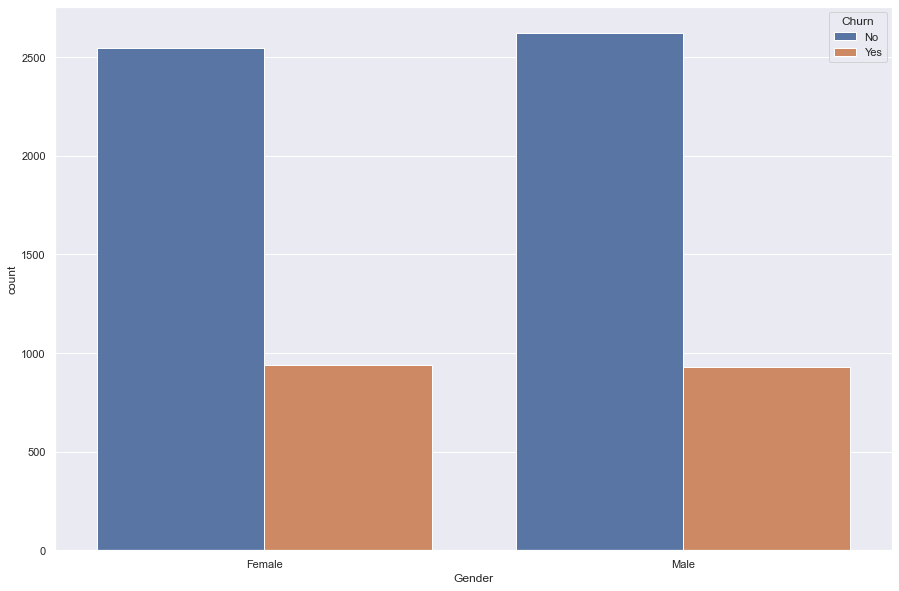

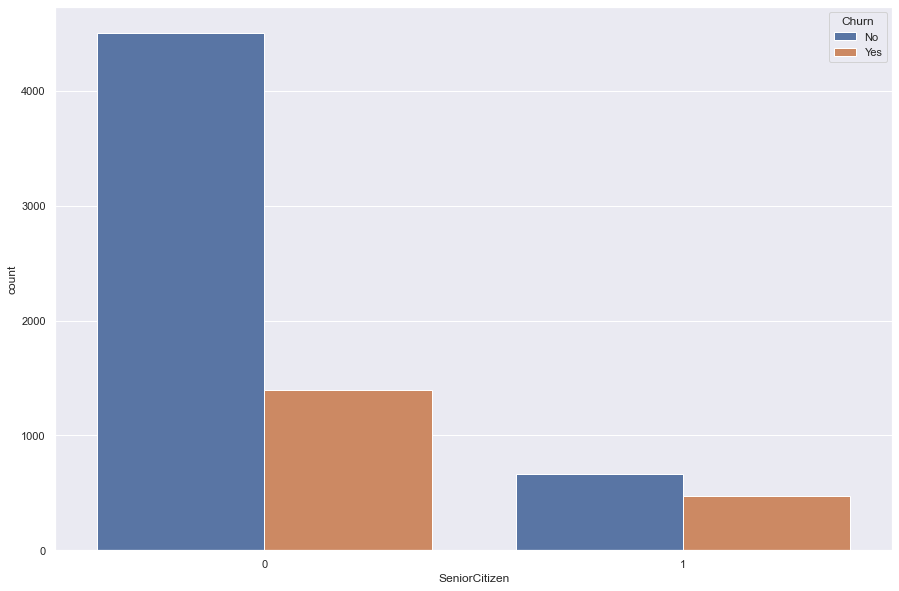

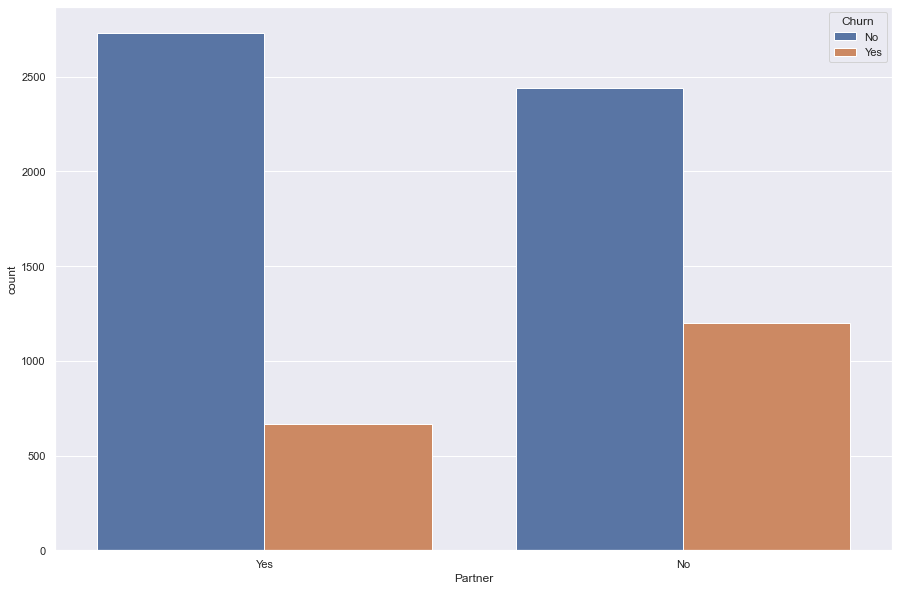

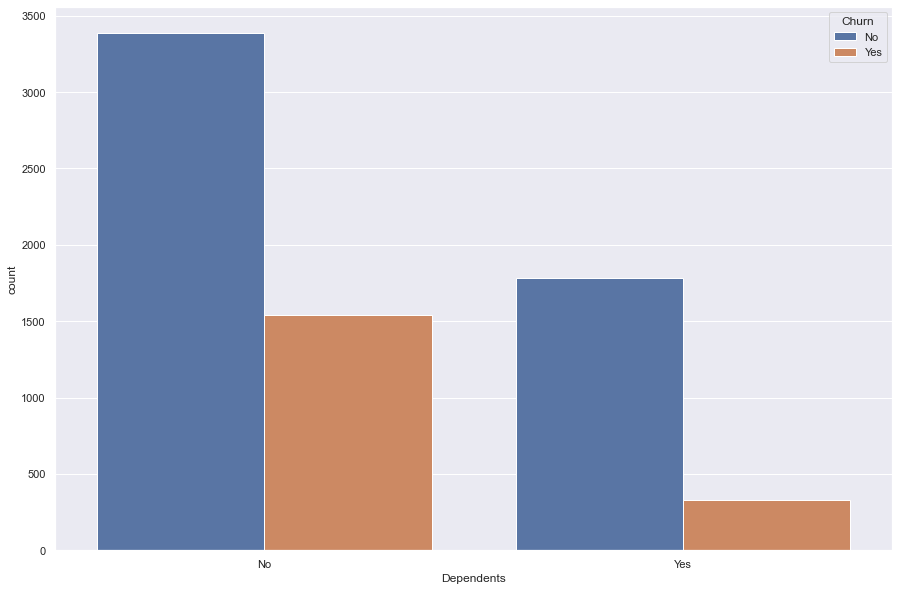

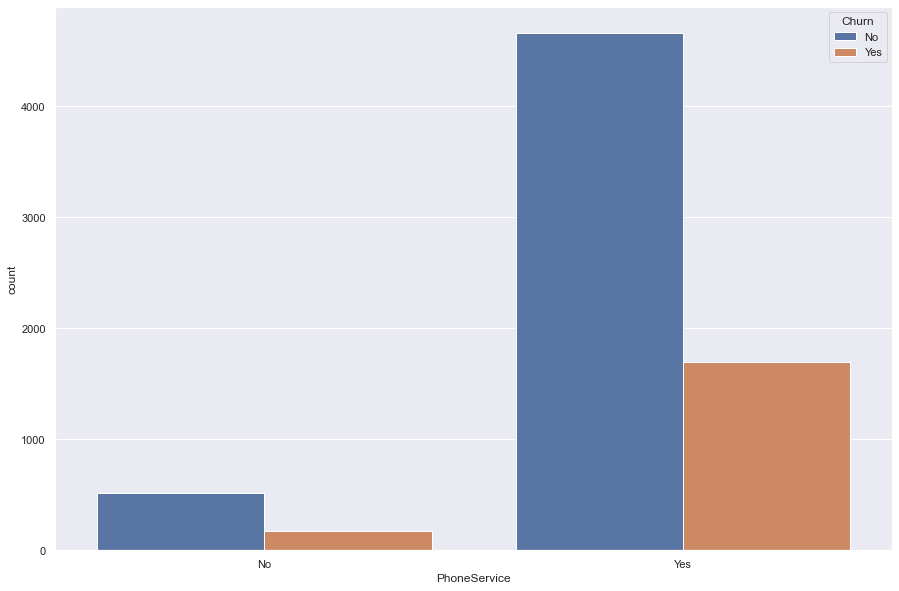

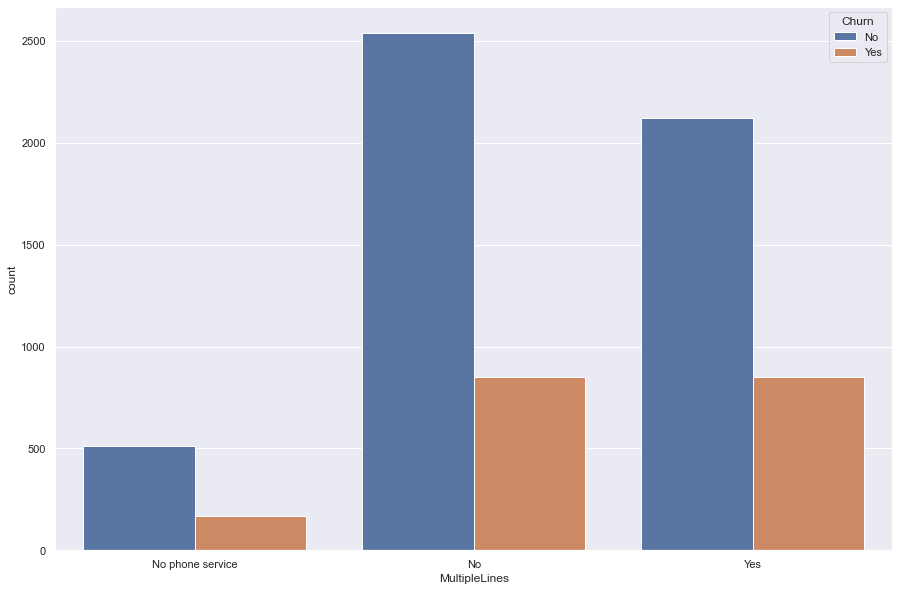

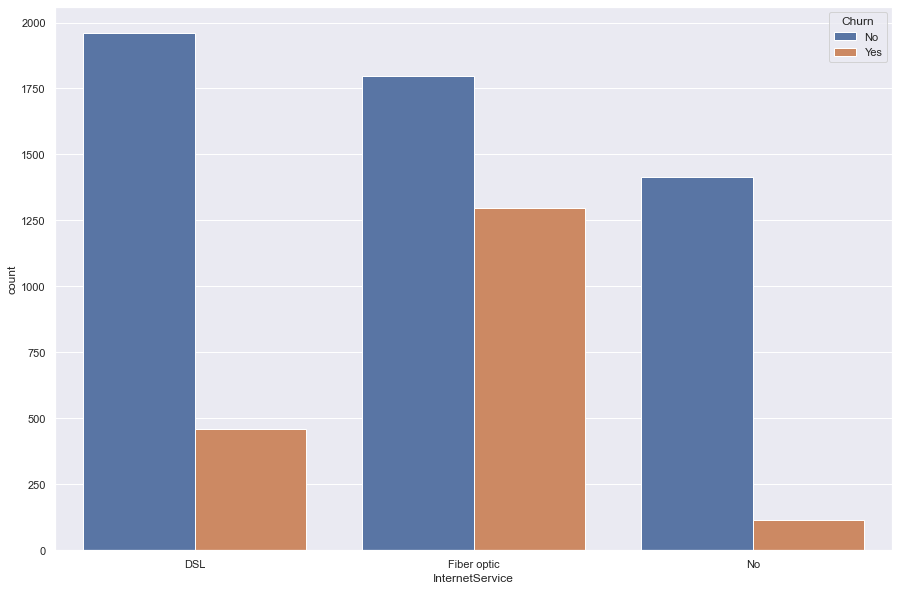

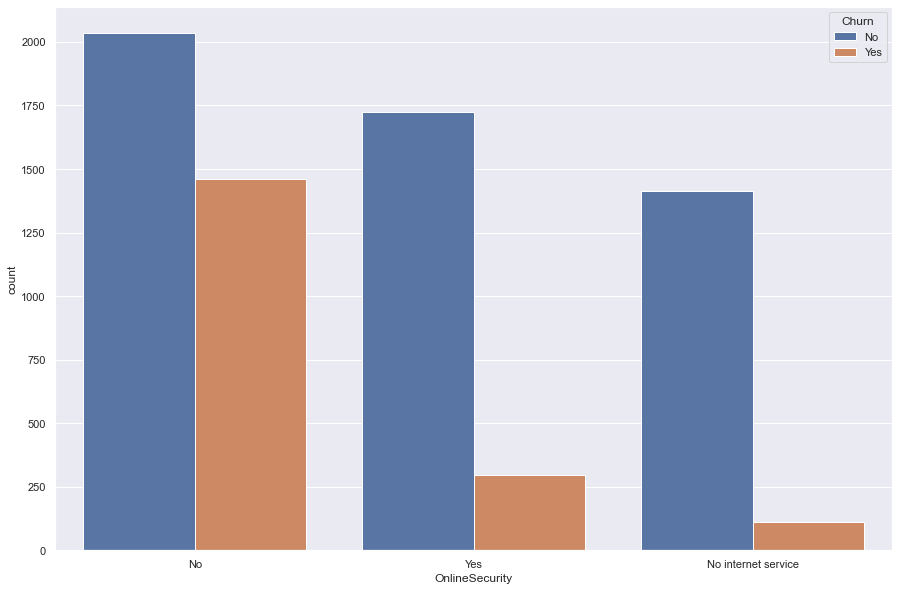

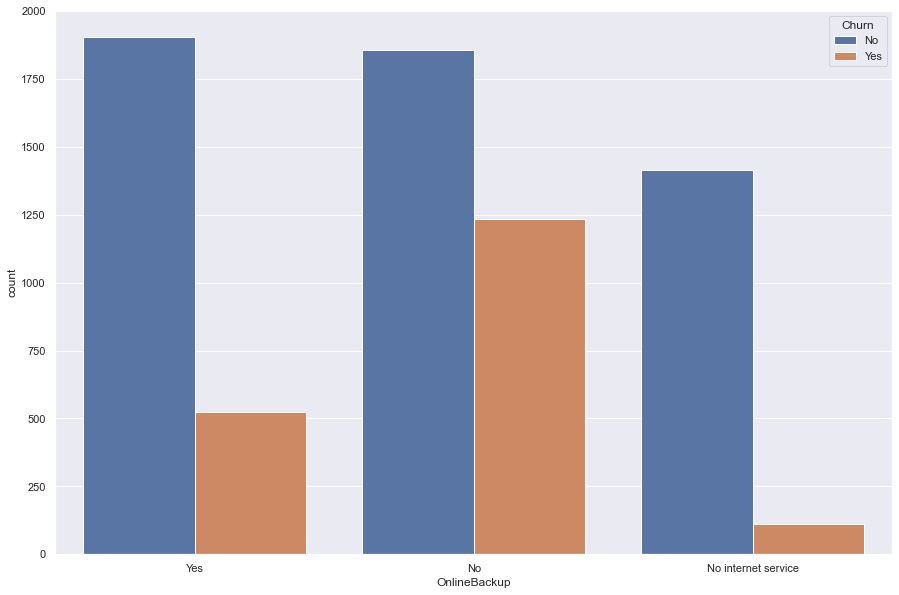

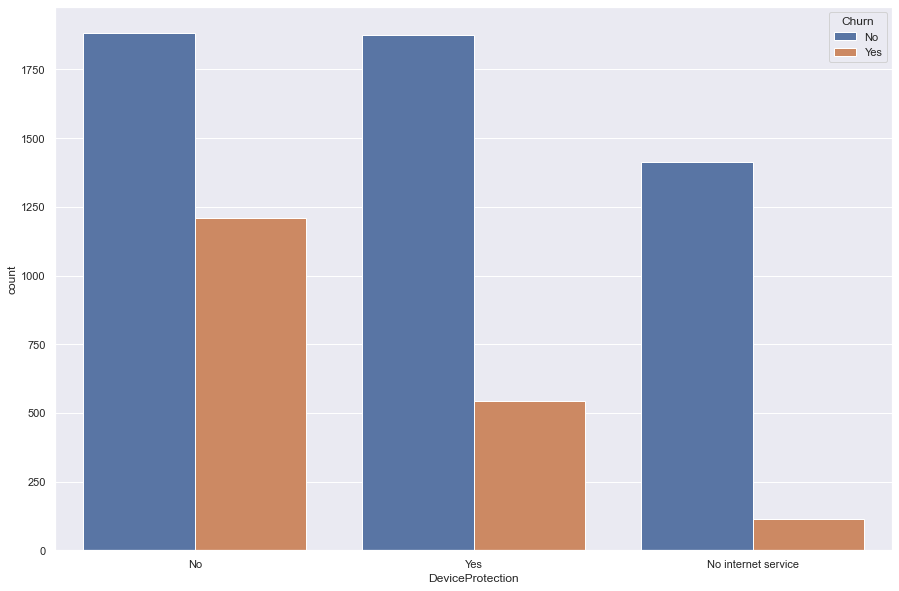

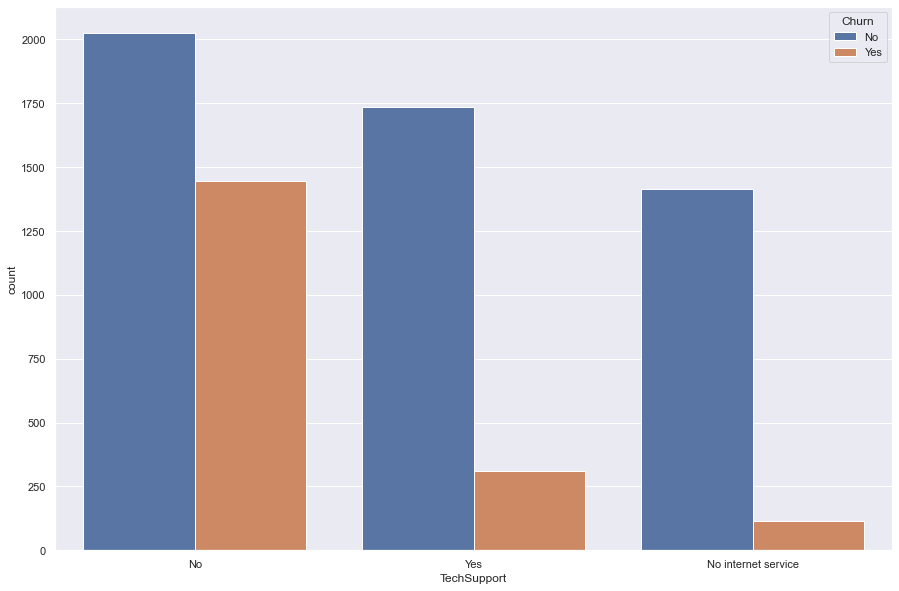

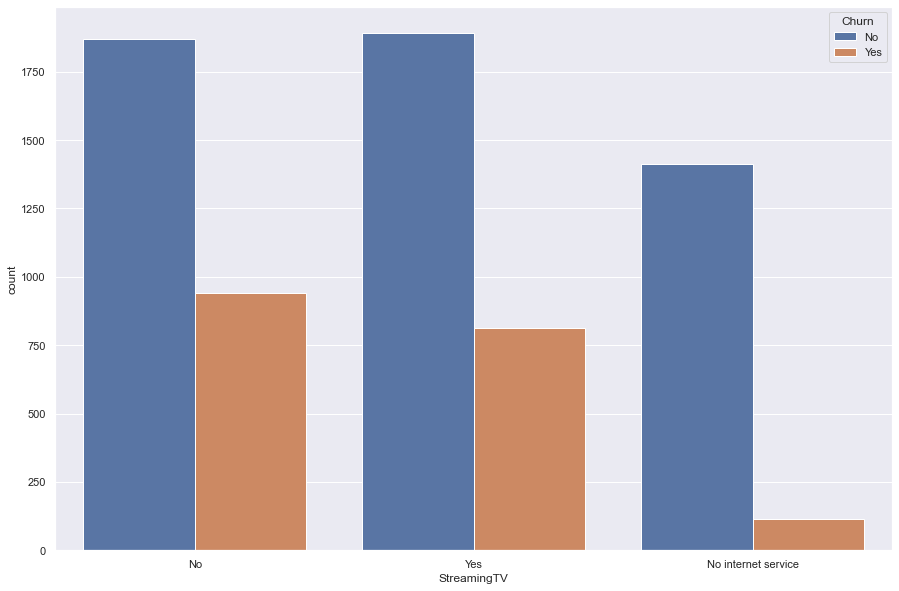

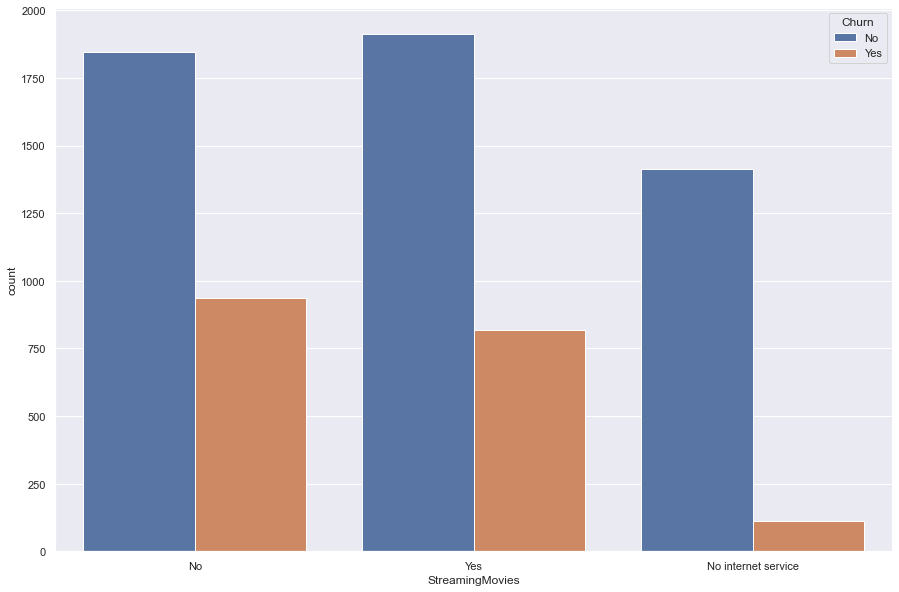

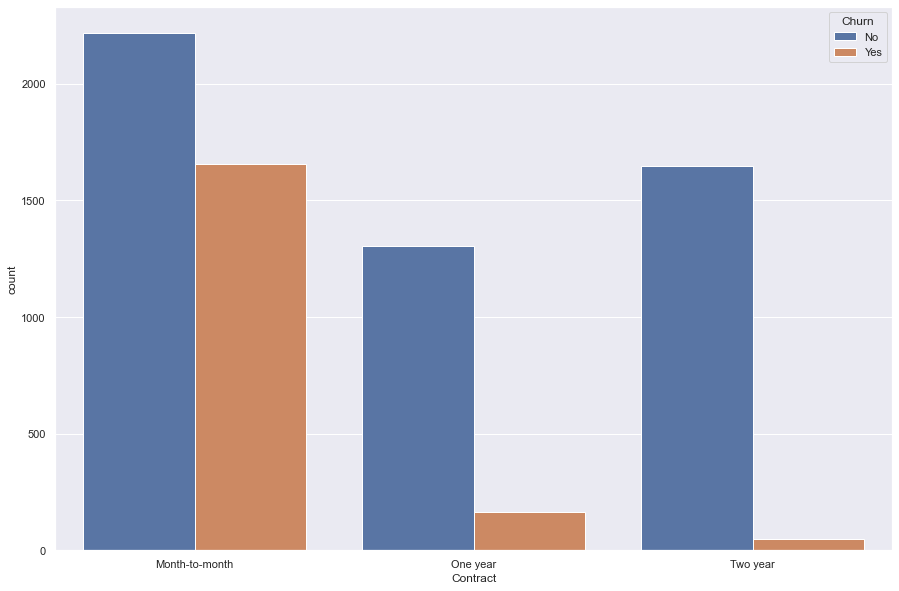

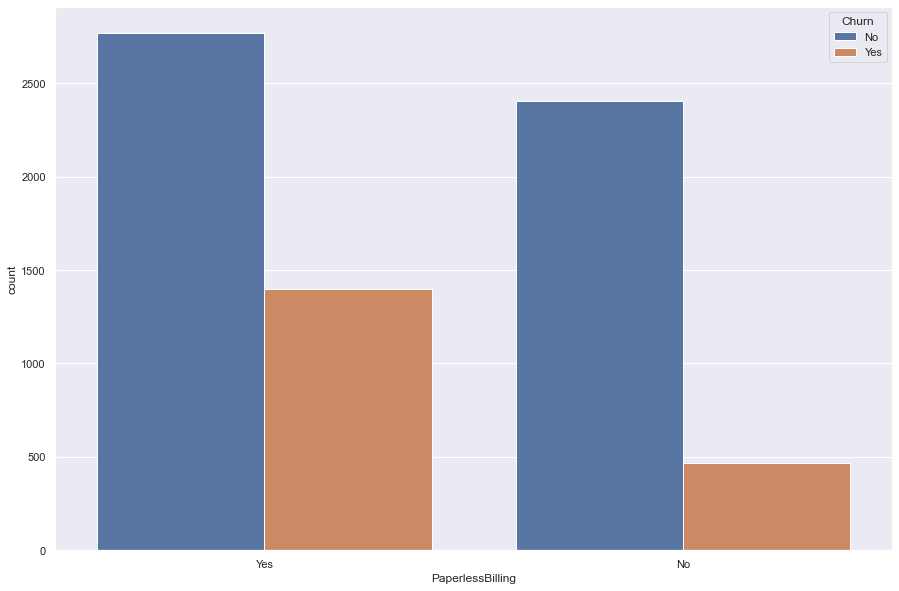

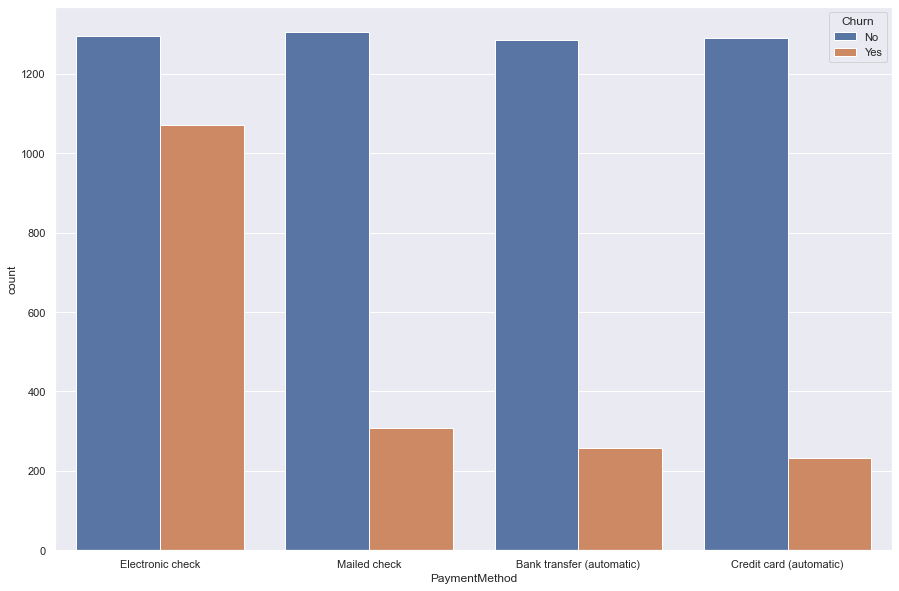

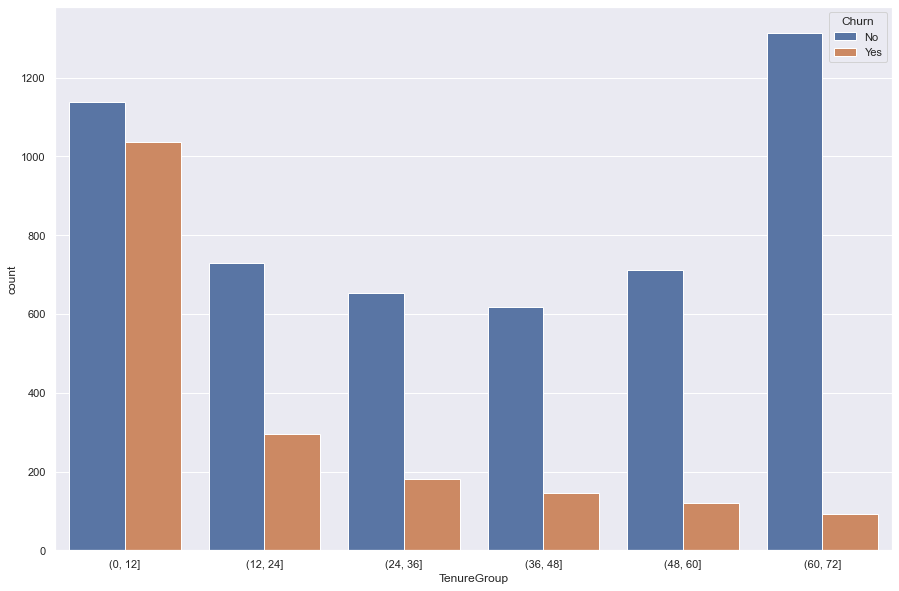

In [38]:
sns.set(rc = {'figure.figsize':(15,10)})
# Univariate Analysis
for i, column in enumerate(cust.drop(columns=['Churn', 'MonthlyCharges','TotalCharges'])):
    plt.figure(i)
    sns.countplot(data=cust, x=column, hue='Churn')

En las gráficas podemos observar algunos factores interesantes. Puede haber indicios de que los clientes que las siguientes características son considerablemente más propensos a irse:
- Clientes con poca permanencia
- Clientes que pagan con cheque electrónico
- Clientes con "paperless billing"
- Clientes con contrato "mes a mes"
- Clientes con fibra óptica
- Clientes categorizdos como "Senior Citizens"

Sin embargo no hemos analizado aquí la relación de la tasa de abandono con el precio que pagan los clientes, vamos a ello.

In [45]:
cust

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,"(0, 12]"
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,"(24, 36]"
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,"(0, 12]"
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,"(36, 48]"
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,"(0, 12]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,"(12, 24]"
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,"(60, 72]"
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,"(0, 12]"
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,"(0, 12]"


In [44]:
# Pasamos ahora a convertir "yes" y "no" a "1" y "0" de la columna resultado, es decir, el churn
cust["Churn"] = cust["Churn"].map({"Yes":1, "No":0})

In [47]:
# Convertimos las variables categóricas en numéricas
dummies = pd.get_dummies(cust)

In [48]:
dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,"TenureGroup_(0, 12]","TenureGroup_(12, 24]","TenureGroup_(24, 36]","TenureGroup_(36, 48]","TenureGroup_(48, 60]","TenureGroup_(60, 72]"
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


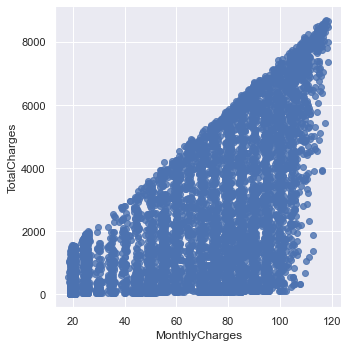

In [55]:
sns.lmplot(data=dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Observamos una correlación positiva entre el aumento del precio mensual y el total.

Text(0.5, 1.0, 'Monthly charges by churn')

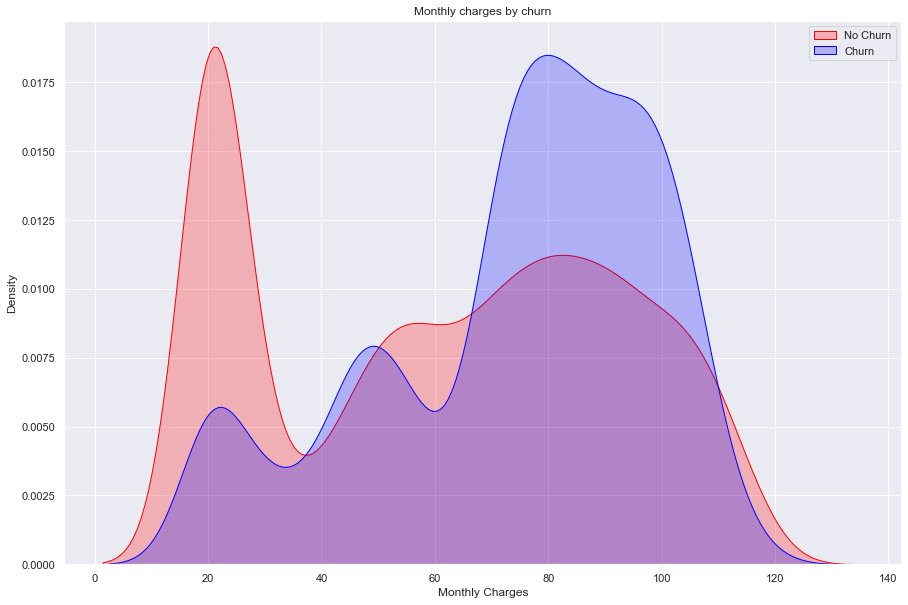

In [62]:
# Comparamos la densidad de los pagos mensuales por tasa de abandono
sns.set(rc = {'figure.figsize':(15,10)})
Mth = sns.kdeplot(dummies["MonthlyCharges"][(dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(dummies["MonthlyCharges"][(dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Text(0.5, 1.0, 'Total charges by churn')

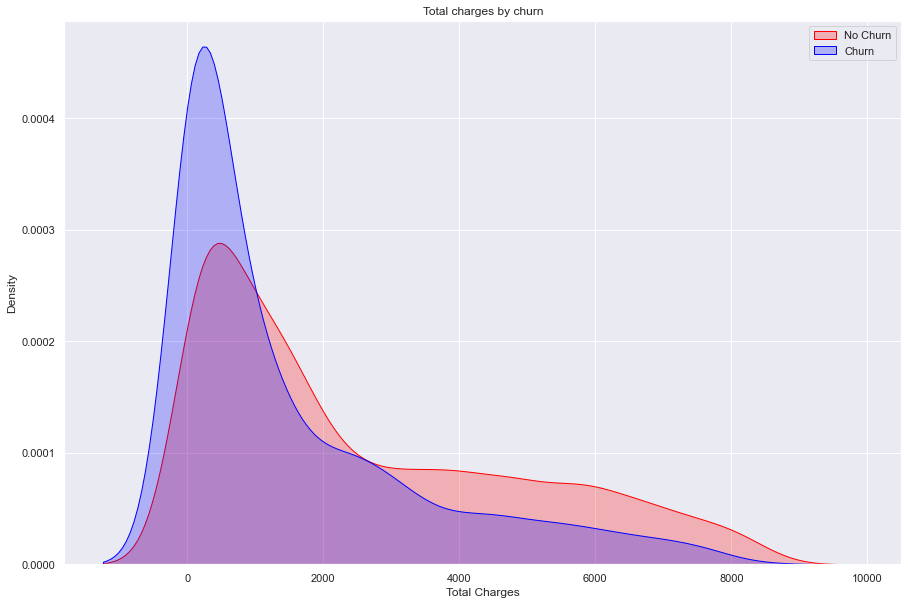

In [64]:
Mth = sns.kdeplot(dummies["TotalCharges"][(dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(dummies["TotalCharges"][(dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total Charges')
Mth.set_title('Total charges by churn')

Como era de esperar, los clientes que pagan más mensualmente son los más propensos a irse. Lo que llama la atención es que parece que los clientes que pagan menos en total son aquellos más propensos a irse.

Esto seguramente se deba a que contratos con altos costes mensuales pero menor permanencia resulten en costes totales menores.

In [56]:
# Correlation
correlation_matrix = dummies.corr()
correlation_matrix

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,"TenureGroup_(0, 12]","TenureGroup_(12, 24]","TenureGroup_(24, 36]","TenureGroup_(36, 48]","TenureGroup_(48, 60]","TenureGroup_(60, 72]"
SeniorCitizen,1.000000,0.220173,0.102411,0.150889,0.001874,-0.001874,-0.016479,0.016479,0.211185,-0.211185,...,-0.016159,-0.024135,0.171718,-0.153477,-0.027239,0.002144,0.027562,-0.000689,0.014434,-0.002062
MonthlyCharges,0.220173,1.000000,0.651065,0.193356,0.014569,-0.014569,-0.096848,0.096848,0.113890,-0.113890,...,0.042812,0.030550,0.271625,-0.377437,-0.190827,-0.046670,0.009899,0.018019,0.070420,0.185840
TotalCharges,0.102411,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.319072,0.319072,-0.064653,0.064653,...,0.186119,0.182663,-0.060436,-0.294708,-0.592443,-0.210745,-0.047370,0.083696,0.252905,0.639312
Churn,0.150889,0.193356,-0.199484,1.000000,0.008612,-0.008612,0.150448,-0.150448,0.164221,-0.164221,...,-0.117937,-0.134302,0.301919,-0.091683,0.320054,0.020308,-0.040637,-0.059229,-0.100416,-0.225500
Gender_Female,0.001874,0.014569,-0.000048,0.008612,1.000000,-1.000000,-0.001808,0.001808,0.010517,-0.010517,...,0.016024,-0.001215,-0.000752,-0.013744,0.001134,0.000701,-0.006196,0.020684,0.004362,-0.016199
Gender_Male,-0.001874,-0.014569,0.000048,-0.008612,-1.000000,1.000000,0.001808,-0.001808,-0.010517,0.010517,...,-0.016024,0.001215,0.000752,0.013744,-0.001134,-0.000701,0.006196,-0.020684,-0.004362,0.016199
Partner_No,-0.016479,-0.096848,-0.319072,0.150448,-0.001808,0.001808,1.000000,-1.000000,0.452676,-0.452676,...,-0.110706,-0.082029,0.083852,0.095125,0.305407,0.048868,-0.002744,-0.034694,-0.104860,-0.279545
Partner_Yes,0.016479,0.096848,0.319072,-0.150448,0.001808,-0.001808,-1.000000,1.000000,-0.452676,0.452676,...,0.110706,0.082029,-0.083852,-0.095125,-0.305407,-0.048868,0.002744,0.034694,0.104860,0.279545
Dependents_No,0.211185,0.113890,-0.064653,0.164221,0.010517,-0.010517,0.452676,-0.452676,1.000000,-1.000000,...,-0.052021,-0.060267,0.150642,-0.059071,0.146661,0.002443,-0.008396,-0.022665,-0.030483,-0.116656
Dependents_Yes,-0.211185,-0.113890,0.064653,-0.164221,-0.010517,0.010517,-0.452676,0.452676,-1.000000,1.000000,...,0.052021,0.060267,-0.150642,0.059071,-0.146661,-0.002443,0.008396,0.022665,0.030483,0.116656


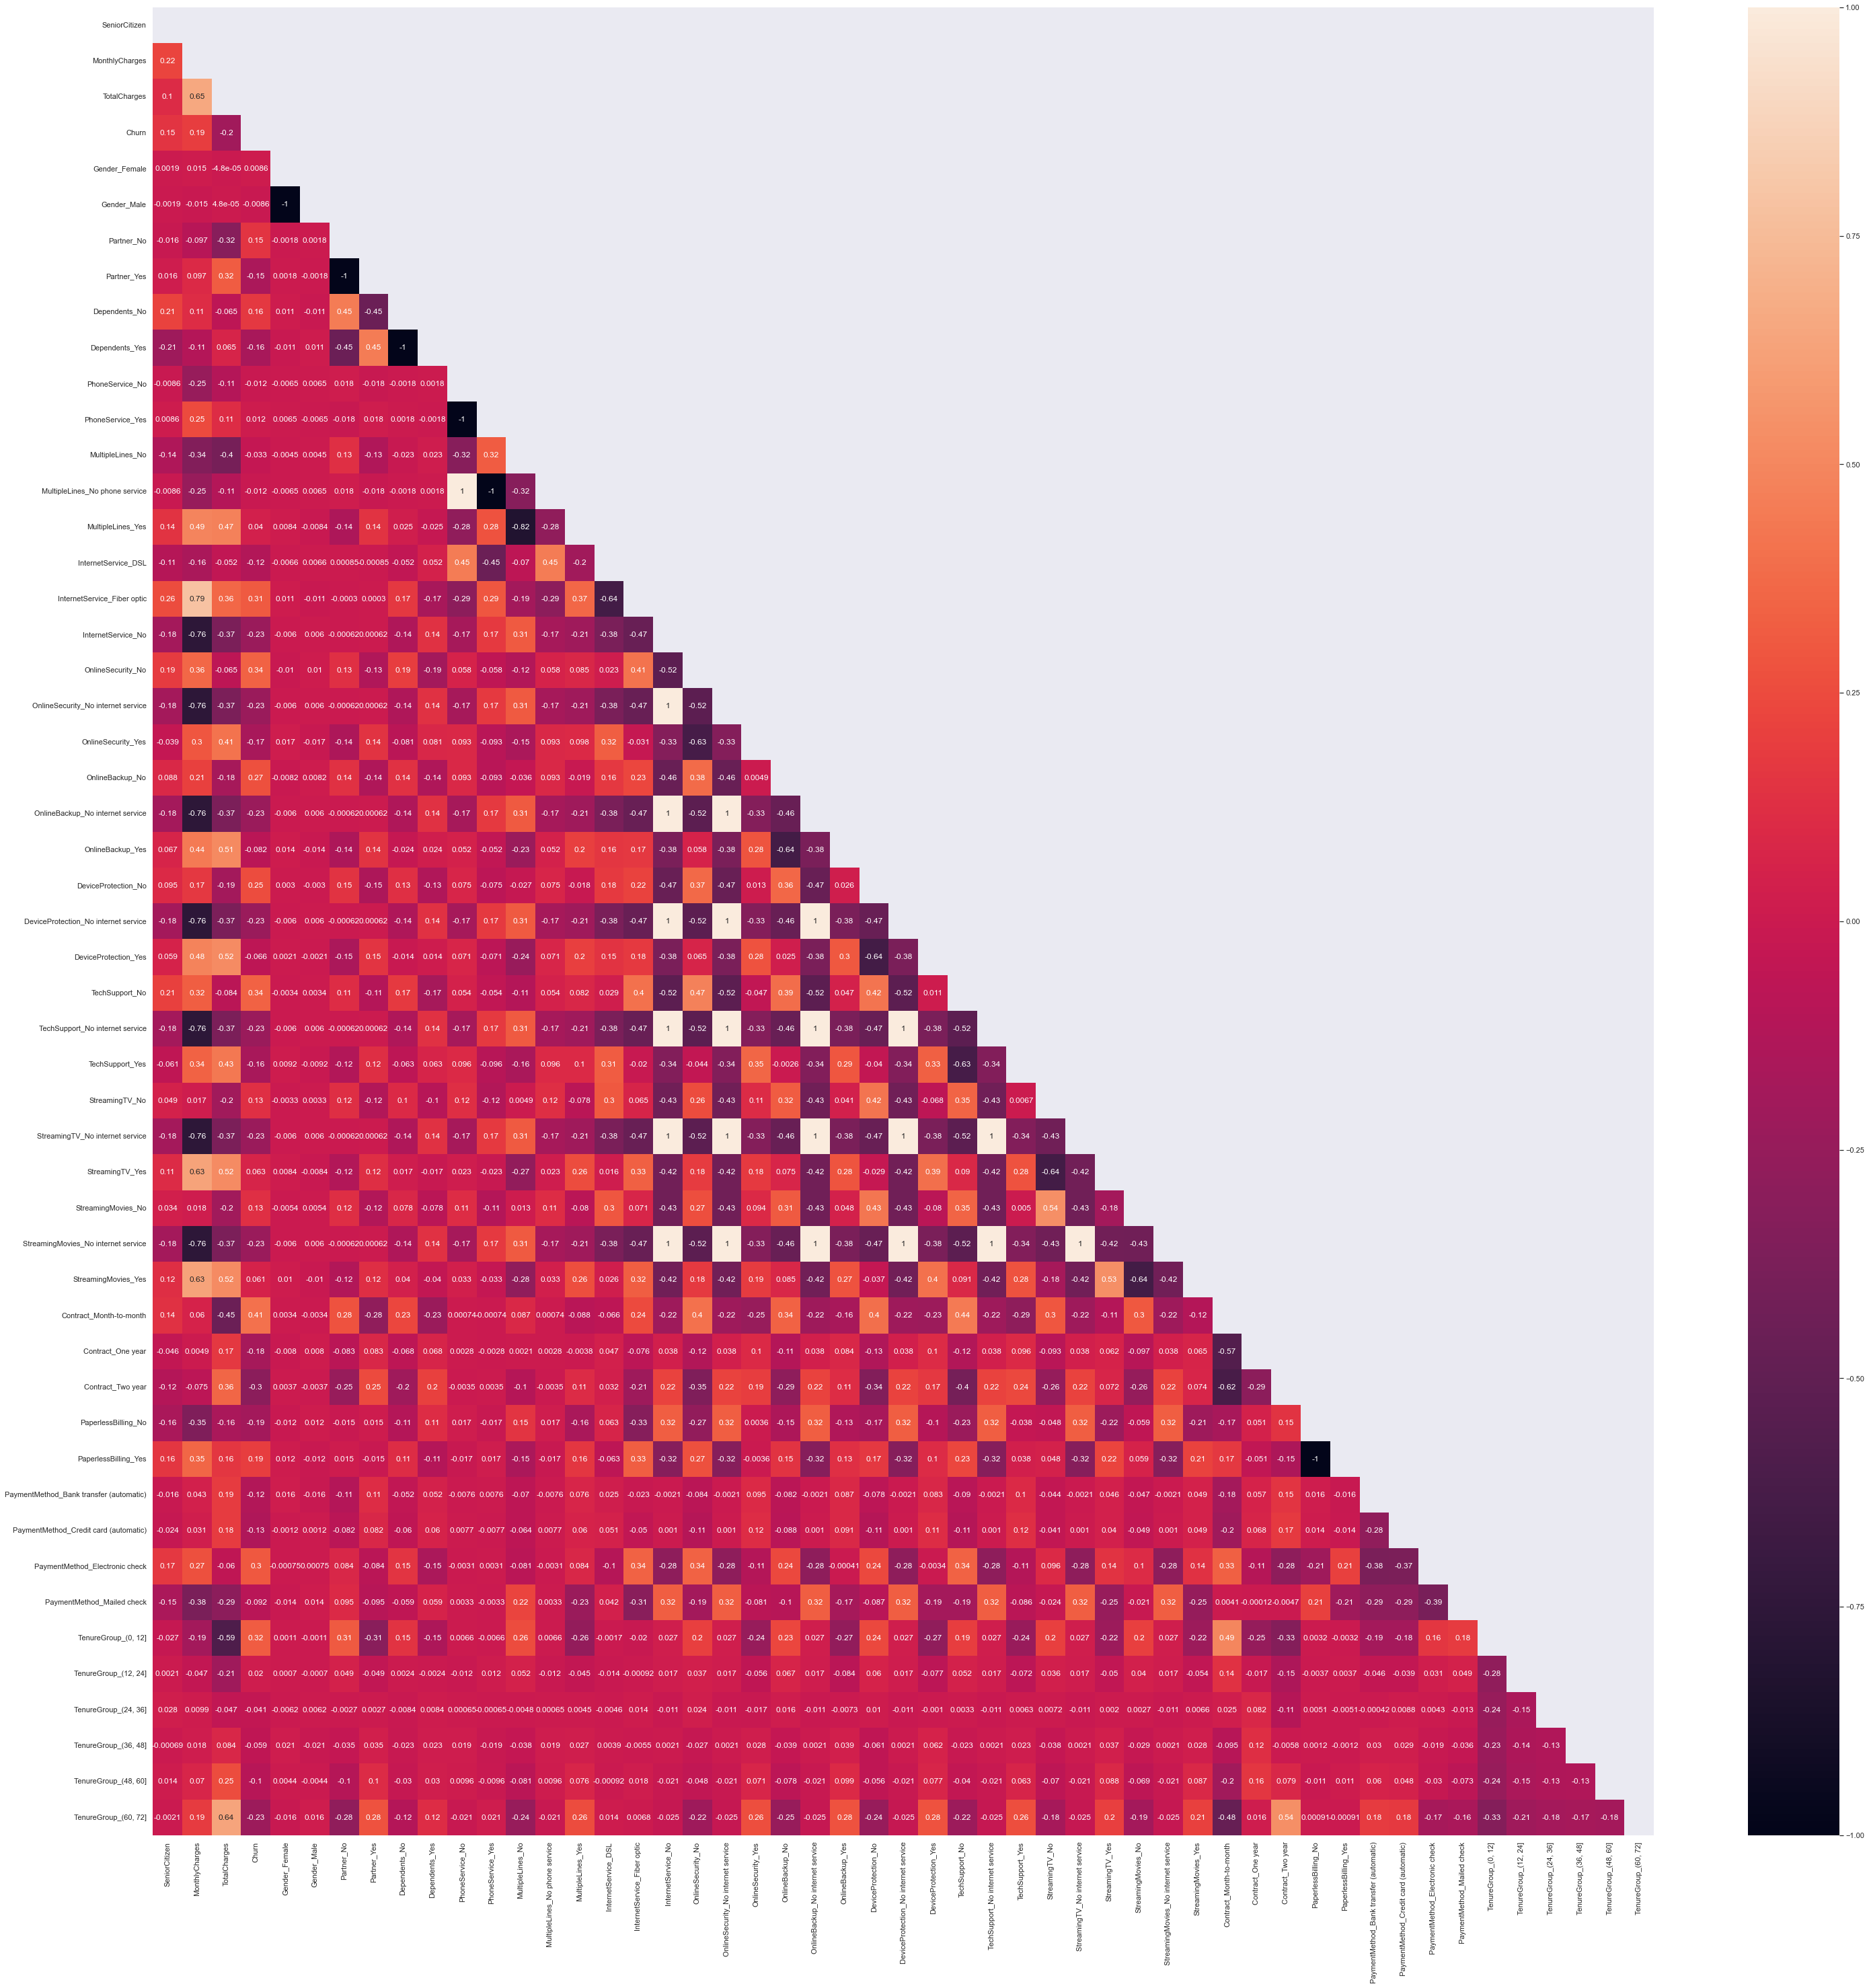

In [67]:
# Máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.set(rc = {'figure.figsize':(50,50)})
sns.heatmap(correlation_matrix,mask=mask, annot=True)
plt.show()